# Basic imports

In [1]:
from functools import partial
import pandas, csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_curve, auc, hamming_loss, zero_one_loss, \
    jaccard_similarity_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.cross_validation import StratifiedKFold as SKF, cross_val_score, KFold
from sklearn import cross_validation
from scipy.special import expit
from sklearn.multiclass import OneVsRestClassifier

# Model data

Results in Xm, Ym

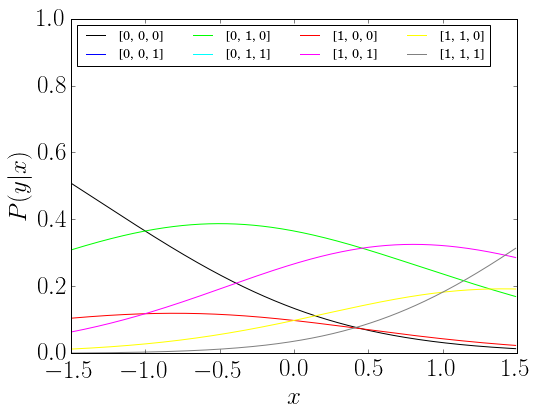

In [2]:
import ModelData
reload(ModelData)            

m = 500

# Model data
Xm, Ym = ModelData.get(m)

# Enable to show and save a chart
ModelData.plotDistribution()

# Number of classes
l = ModelData.l

## Using data

In [3]:
# Model
Xc = Xm
Yc = Ym

## Metrics

In [5]:
import MLCCV
reload(MLCCV)
import MLCLoss
reload(MLCLoss)

# Metrics for whole matrices
metrics = {"S": MLCLoss.subsetLossN}

## Array of losses for PCC

In [6]:
losses = {"S": MLCLoss.subsetLoss}
import PCC
reload(PCC)

<module 'PCC' from 'PCC.pyc'>

## Training PCC, SubsetLoss(train size)

In [116]:
#objects = [10, 20, 30, 40, 50, 60]
objects = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500]
loss = 'S'
result_train_mean = []
result_train_std = []
result_test_mean = []
result_test_std = []
for ob in objects:
    cv = cross_validation.ShuffleSplit(Xc.shape[0], n_iter=10, train_size=ob, test_size = 0.1, random_state=0)
    
    classifier = PCC.PCC(estimator = estimator, loss = losses[loss])
    
    res = MLCCV.cross_val_score_multiple_metrics(estimator = classifier, metrics = metrics,
                                cv = cv, X = Xc, Y = Yc, do_train = True)
    arr = res[loss + " train"]
    arr1 = res[loss + " test"]
    result_train_mean.append(np.mean(arr))
    result_train_std.append(np.std(arr))
    result_test_mean.append(np.mean(arr1))
    result_test_std.append(np.std(arr1))

i=0 coef=[[-0.09124547]]
i=1 coef=[[ 0.6539464  -0.88131678]]
i=2 coef=[[ 0.5647578   1.12261569 -0.66058406]]
i=0 coef=[[ 0.66261129]]
i=1 coef=[[ 0.64293454 -0.24703641]]
i=2 coef=[[ 1.08877674  0.27275116 -0.70999116]]
i=0 coef=[[-0.31200868]]
i=1 coef=[[-0.01416545 -1.14089269]]
i=2 coef=[[-0.0577745   0.96282971 -1.29296788]]
i=0 coef=[[ 0.96313741]]
i=1 coef=[[ 0.37509826 -0.97123751]]
i=2 coef=[[ 0.78603294  1.11995846 -0.83257195]]
i=0 coef=[[ 0.42947835]]
i=1 coef=[[ 0.51494823 -0.80036084]]
i=2 coef=[[ 0.21350189  0.76970122 -0.28738309]]
i=0 coef=[[ 1.16917557]]
i=1 coef=[[ 0.76212298  0.00119207]]
i=2 coef=[[ 0.96743985  0.77390282 -0.37482737]]
i=0 coef=[[ 0.97493338]]
i=1 coef=[[-0.06106715  0.56304493]]
i=2 coef=[[ 1.1094678   0.39589814 -0.52989862]]
i=0 coef=[[ 0.64334164]]
i=1 coef=[[ 0.39714342 -1.10841293]]
i=2 coef=[[ 0.39407803  0.99043796 -0.79002833]]
i=0 coef=[[ 0.39797623]]
i=1 coef=[[ 0.96783358 -0.71839205]]
i=2 coef=[[-0.07928161  1.0846392  -1.13168545]]
i

ValueError: train_size=500 should be smaller than the number of samples 500

## Showing SubsetLoss(train size)

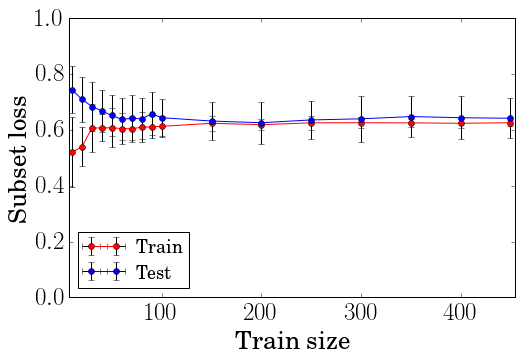

In [146]:
objects = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450]
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)

plt.errorbar(objects, result_train_mean, fmt='or-', label=r"Train",
             xerr=0, yerr=result_train_std, ecolor='black')
plt.errorbar(objects, result_test_mean, fmt='ob-', label=r"Test",
             xerr=0, yerr=result_test_std, ecolor='black')
plt.xlabel('Train size', fontsize=25)
plt.ylabel(r'Subset loss', fontsize=25)
plt.legend(loc='lower left', fontsize=18)
plt.ylim([0,1])
plt.xlim([7,455])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataTrainSize.eps", bbox_inches = 'tight')
plt.show()

## Training PCC, SubsetLoss(regularization)

In [37]:
loss = 'S'
result_train_mean = []
result_train_std = []
result_test_mean = []
result_test_std = []
#for ob in objects:
#,
C = [0.0001, 0.0005, 0.001, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 50.0, 100.0, 1000.0]
cv = cross_validation.ShuffleSplit(Xc.shape[0], n_iter=10, train_size=200, test_size = 0.1, random_state=0)
for reg in C:
    estimator = LR(class_weight = 'balanced', fit_intercept = True, solver='liblinear', n_jobs=2, penalty='l2', C = reg)
    
    classifier = PCC.PCC(estimator = estimator, loss = losses[loss])
    
    res = MLCCV.cross_val_score_multiple_metrics(estimator = classifier, metrics = metrics,
                                cv = cv, X = Xc, Y = Yc, do_train = True)
    arr = res[loss + " train"]
    arr1 = res[loss + " test"]
    result_train_mean.append(np.mean(arr))

    result_train_std.append(np.std(arr))
    result_test_mean.append(np.mean(arr1))
    result_test_std.append(np.std(arr1))

i=0 coef=[[ 0.00251197]]
i=1 coef=[[ 0.00129606 -0.00187801]]
i=2 coef=[[ 0.00234795  0.00348102 -0.00236154]]
i=0 coef=[[ 0.00225681]]
i=1 coef=[[ 0.00258232 -0.00122915]]
i=2 coef=[[ 0.00213605  0.00333396 -0.001728  ]]
i=0 coef=[[ 0.00303334]]
i=1 coef=[[ 0.00142809 -0.0020279 ]]
i=2 coef=[[ 0.00267619  0.00328472 -0.00217913]]
i=0 coef=[[ 0.00288067]]
i=1 coef=[[ 0.00154035 -0.00167573]]
i=2 coef=[[ 0.00270245  0.00342341 -0.00234799]]
i=0 coef=[[ 0.00318386]]
i=1 coef=[[ 0.00120623 -0.00175096]]
i=2 coef=[[ 0.00260645  0.00346125 -0.00227933]]
i=0 coef=[[ 0.00308263]]
i=1 coef=[[ 0.00170932 -0.00172226]]
i=2 coef=[[ 0.00232619  0.0033472  -0.00210672]]
i=0 coef=[[ 0.00270886]]
i=1 coef=[[ 0.0016475  -0.00151256]]
i=2 coef=[[ 0.00276071  0.00363684 -0.00181481]]
i=0 coef=[[ 0.00222278]]
i=1 coef=[[ 0.00220938 -0.00177156]]
i=2 coef=[[ 0.00236925  0.00335962 -0.00193503]]
i=0 coef=[[ 0.00297785]]
i=1 coef=[[ 0.00227657 -0.00134991]]
i=2 coef=[[ 0.00306504  0.00369013 -0.00210696]]
i

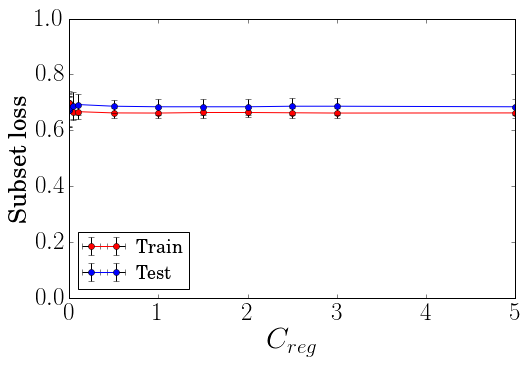

In [50]:
lmax=999
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)

plt.errorbar(C[:lmax], result_train_mean[:lmax], fmt='or-', label=r"Train",
             xerr=0, yerr=result_train_std[:lmax], ecolor='black')
plt.errorbar(C[:lmax], result_test_mean[:lmax], fmt='ob-', label=r"Test",
             xerr=0, yerr=result_test_std[:lmax], ecolor='black')
plt.xlabel('$C_{reg}$', fontsize=30)
plt.ylabel(r'Subset loss', fontsize=25)
plt.legend(loc='lower left', fontsize=18)
plt.ylim([0,1])
plt.xlim([0,5])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataReg.eps", bbox_inches = 'tight')
plt.show()

## Time (train size)

In [60]:
import time
#objects = [10, 20, 30, 40, 50, 60]
objects = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450]
loss = 'S'
time_train_mean = []
time_train_std = []
time_test_mean = []
time_test_std = []
for ob in objects:
    cv = cross_validation.ShuffleSplit(Xc.shape[0], n_iter=5, train_size=ob, test_size = 0, random_state=0)
    
    classifier = PCC.PCC(estimator = estimator, loss = losses[loss])
    
    arr = []
    arr1 = []
    
    for ITrain, ITest in cv:
        t0 = time.time()
        classifier.fit(Xc[ITrain], Yc[ITrain])
        t1 = time.time()
        classifier.predict(Xc[ITrain])
        t2 = time.time()
        arr.append(t1 - t0)
        arr1.append(t2 - t1)
    
    time_train_mean.append(np.mean(arr))
    time_train_std.append(np.std(arr))
    time_test_mean.append(np.mean(arr1))
    time_test_std.append(np.std(arr1))

i=0 coef=[[ 0.02621833]]
i=1 coef=[[ 2.30109851 -1.85104068]]
i=2 coef=[[  6.71118052  10.08643701 -15.24589814]]
i=0 coef=[[ 0.34427083]]
i=1 coef=[[  6.66556385 -18.77394472]]
i=2 coef=[[  4.36933457   1.71803719 -13.25781454]]
i=0 coef=[[ 0.45861616]]
i=1 coef=[[ 4.20813168 -2.04663159]]
i=2 coef=[[  9.97381975   4.6734743  -19.48583227]]
i=0 coef=[[-0.01561554]]
i=1 coef=[[ 0.88730696 -6.68047641]]
i=2 coef=[[ 4.34988957  6.34859382 -5.27900393]]
i=0 coef=[[ 1.3931958]]
i=1 coef=[[ 0.78571815 -0.13156872]]
i=2 coef=[[ -3.64976651  13.90363418  -5.20261218]]
i=0 coef=[[ 1.06522133]]
i=1 coef=[[ 2.12201029 -3.07847569]]
i=2 coef=[[ 2.89735017  7.06884074 -2.32913529]]
i=0 coef=[[ 0.8623571]]
i=1 coef=[[  7.7494167  -23.92160998]]
i=2 coef=[[  2.25789696   1.95009176 -10.37017471]]
i=0 coef=[[ 1.01524766]]
i=1 coef=[[ 2.23520098 -2.56514454]]
i=2 coef=[[ 2.1232581   5.82480671 -4.55066272]]
i=0 coef=[[ 0.33445621]]
i=1 coef=[[ 1.35209429 -3.09039485]]
i=2 coef=[[  6.71538763   8.30645

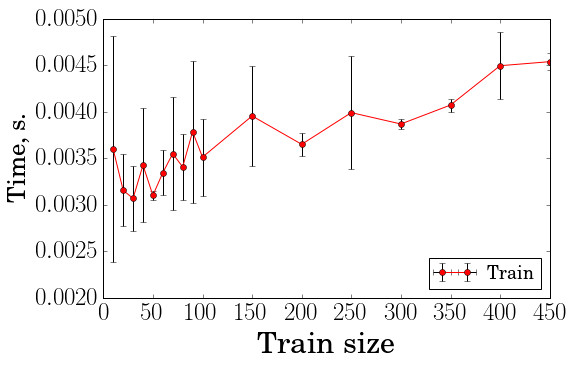

In [65]:
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)

plt.errorbar(objects, time_train_mean, fmt='or-', label=r"Train",
             xerr=0, yerr=time_train_std, ecolor='black')
plt.xlabel('Train size', fontsize=30)
plt.ylabel(r'Time, s.', fontsize=25)
plt.legend(loc='lower right', fontsize=18)
#plt.ylim([0,1])
#plt.xlim([0,5])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataTimingTrain.eps", bbox_inches = 'tight')
plt.show()

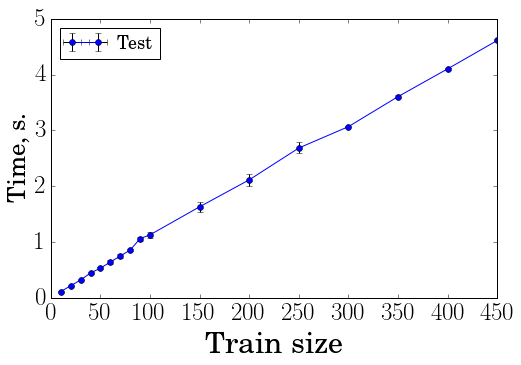

In [66]:
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)
plt.errorbar(objects, time_test_mean, fmt='ob-', label=r"Test", xerr=0, yerr=time_test_std, ecolor='black')
plt.xlabel('Train size', fontsize=30)
plt.ylabel(r'Time, s.', fontsize=25)
plt.legend(loc='upper left', fontsize=18)
#plt.ylim([0,1])
#plt.xlim([0,5])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataTimingTest.eps", bbox_inches = 'tight')
plt.show()